<h1>Exploratory Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
warnings.filterwarnings("ignore")
import numpy as np


In [2]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Case_Studies/Cancer_Dignosis/Trainning/training_variants')

In [3]:
#print("No of data points:-",data.size)
print("No of data points:-",data.shape)
print("Features:-",data.columns.values)
data.head()

No of data points:- (3321, 4)
Features:- ['ID' 'Gene' 'Variation' 'Class']


,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4


In [4]:
data.isnull().sum()

ID           0
Gene         0
Variation    0
Class        0
dtype: int64

In [5]:
#Reading text data
data_text = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Case_Studies/Cancer_Dignosis/Trainning/training_text",sep="\|\|",engine="python",names=["ID","TEXT"],skiprows=1)
print("No of datapoints:-",data_text.shape[0])
print("No of features:-",data_text.shape[1])
print("Features:-",data_text.columns.values)
data_text.head()

No of datapoints:- 3321
No of features:- 2
Features:- ['ID' 'TEXT']


,ID,TEXT
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...


<h1>Preprossing of text

In [6]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [7]:
import re
from nltk.corpus import stopwords

In [8]:
#loading stopwords from nltk libraries
stop_words = set(stopwords.words('english'))

def nlp_preprocessing(total_text,index,column):
  if(type(total_text)) is not int:
    string = ""
    #replace every special character with space
    total_text = re.sub('[^a-zA-z0-9]',' ',total_text)
    #replace multiple spaces with single space
    total_text = re.sub("\s+",' ',total_text)
    total_text = total_text.lower()

    for word in total_text.split():
    # if the word is a not a stop word then retain that word from the data

      if not word in stop_words:
        string += word + " "

    data_text[column][index] = string

In [9]:
#text preprossing stage
start_time = time.clock()
for index , row in data_text.iterrows():
  if type(row['TEXT']) is str:
    nlp_preprocessing(row['TEXT'],index,'TEXT')
  else:
    print("There is no text for id:",index)  
print('Time took for preprocessing the text :',time.clock() - start_time, "seconds")

There is no text for id: 1109
There is no text for id: 1277
There is no text for id: 1407
There is no text for id: 1639
There is no text for id: 2755
Time took for preprocessing the text : 48.873771999999995 seconds


In [10]:
#merging both gene_variations and text data based on ID
result = pd.merge(data, data_text,on='ID', how='left')
result.head()


,ID,Gene,Variation,Class,TEXT
0,0,FAM58A,Truncating Mutations,1,cyclin dependent kinases cdks regulate variety...
1,1,CBL,W802*,2,abstract background non small cell lung cancer...
2,2,CBL,Q249E,2,abstract background non small cell lung cancer...
3,3,CBL,N454D,3,recent evidence demonstrated acquired uniparen...
4,4,CBL,L399V,4,oncogenic mutations monomeric casitas b lineag...


In [11]:
#check null values
result[result.isnull().any(axis=1)]

,ID,Gene,Variation,Class,TEXT
1109,1109,FANCA,S1088F,1,NaN
1277,1277,ARID5B,Truncating Mutations,1,NaN
1407,1407,FGFR3,K508M,6,NaN
1639,1639,FLT1,Amplification,6,NaN
2755,2755,BRAF,G596C,7,NaN


In [12]:
result.loc[result['TEXT'].isnull(),'TEXT'] = result['Gene'] + ' ' + result['Variation']

<h1>Train, Test,and Cross Validation split(64:20:16)

In [13]:
y_true = result['Class'].values
result.Gene = result.Gene.str.replace('\s+','_')
result.Variation = result.Variation.str.replace('\s+','_')

In [14]:
from sklearn.model_selection import train_test_split

#split data into test and train by maintaining same distribution of output variable 'y_true'[stratify=y_true]
x_train, test_df, y_train,y_test = train_test_split(result,y_true,stratify=y_true,test_size=0.2)

#split train data into train and cross validation by maintainig same distribution of  output variable y_train
train_df, cv_df, y_train, y_cv =train_test_split(x_train,y_train,stratify=y_train,test_size=0.2)

In [15]:
print("No of data points in train data:-",train_df.shape[0])
print("No of data points in test data:-",test_df.shape[0])
print("No of data points in test data:-",cv_df.shape[0])

No of data points in train data:- 2124
No of data points in test data:- 665
No of data points in test data:- 532


<h1>Disteribution of y_i's in train,test and cross validation dataset

In [16]:
train_class_distribution = train_df['Class'].value_counts().sort_index()
test_class_distribution = test_df['Class'].value_counts().sort_index()
cv_class_distribution = cv_df['Class'].value_counts().sort_index()




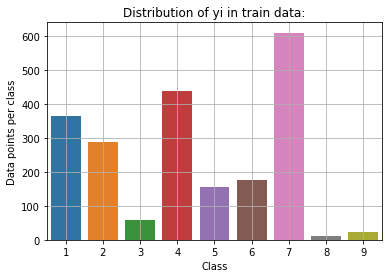

Number of data points in class 7 : 609 ( 28.672 % )
Number of data points in class 4 : 439 ( 20.669 % )
Number of data points in class 1 : 363 ( 17.09 % )
Number of data points in class 2 : 289 ( 13.606 % )
Number of data points in class 6 : 176 ( 8.286 % )
Number of data points in class 5 : 155 ( 7.298 % )
Number of data points in class 3 : 57 ( 2.684 % )
Number of data points in class 9 : 24 ( 1.13 % )
Number of data points in class 8 : 12 ( 0.565 % )
--------------------------------------------------------------------------------


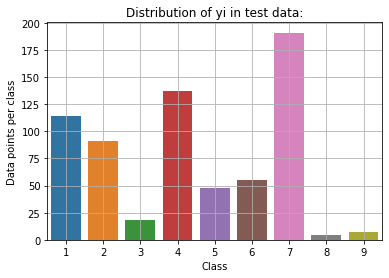

Number of data points in class 7 : 191 ( 28.722 % )
Number of data points in class 4 : 137 ( 20.602 % )
Number of data points in class 1 : 114 ( 17.143 % )
Number of data points in class 2 : 91 ( 13.684 % )
Number of data points in class 6 : 55 ( 8.271 % )
Number of data points in class 5 : 48 ( 7.218 % )
Number of data points in class 3 : 18 ( 2.707 % )
Number of data points in class 9 : 7 ( 1.053 % )
Number of data points in class 8 : 4 ( 0.602 % )
--------------------------------------------------------------------------------


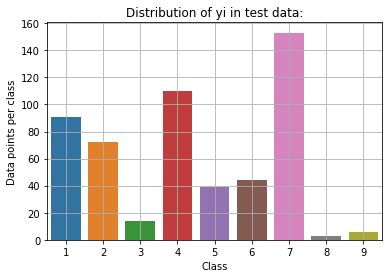

Number of data points in class 7 : 153 ( 28.759 % )
Number of data points in class 4 : 110 ( 20.677 % )
Number of data points in class 1 : 91 ( 17.105 % )
Number of data points in class 2 : 72 ( 13.534 % )
Number of data points in class 6 : 44 ( 8.271 % )
Number of data points in class 5 : 39 ( 7.331 % )
Number of data points in class 3 : 14 ( 2.632 % )
Number of data points in class 9 : 6 ( 1.128 % )
Number of data points in class 8 : 3 ( 0.564 % )


In [17]:
import seaborn as sns

sns.barplot(x=train_class_distribution.index,y=train_class_distribution.values)
plt.xlabel('Class')
plt.ylabel('Data points per class')
plt.title("Distribution of yi in train data:")
plt.grid()
plt.show()

sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',train_class_distribution.values[i], '(',round(train_class_distribution.values[i]/train_df.shape[0]*100,3),'%' ,')' )


print('-'*80)
sns.barplot(x=test_class_distribution.index,y=test_class_distribution.values)
plt.xlabel('Class')
plt.ylabel('Data points per class')
plt.title("Distribution of yi in test data:")
plt.grid()
plt.show()

sorted_yi = np.argsort(-test_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',test_class_distribution.values[i], '(',round(test_class_distribution.values[i]/test_df.shape[0]*100,3),'%' ,')' )


print('-'*80)
sns.barplot(x=cv_class_distribution.index,y=cv_class_distribution.values)
plt.xlabel('Class')
plt.ylabel('Data points per class')
plt.title("Distribution of yi in test data:")
plt.grid()
plt.show()

sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',cv_class_distribution.values[i], '(',round(cv_class_distribution.values[i]/cv_df.shape[0]*100,3),'%' ,')' )




<h1>Prediction using a 'Random' Model




<p style="font-size:16px"> In a 'Random' Model, we generate the NINE class probabilites randomly such that they sum to 1. </p>

In [18]:
#This function plots confusion matrix given y_i,y_i_hat
from sklearn.metrics import confusion_matrix,log_loss
def plot_confusion_matrix(test_y,predict_y):
  C = confusion_matrix(test_y,predict_y)

  A = (((C.T)/(C.sum(axis=1))).T)

  B =(C/C.sum(axis=0))

  labels = [1,2,3,4,5,6,7,8,9]

  #representing A in heatmap format
  print("_"*20,"Confusion matrix","_"*20)

  plt.figure(figsize=(20,7))
  sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
  plt.xlabel('Predicted Class')
  plt.ylabel('Original Class')
  plt.show()

  print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)
  plt.figure(figsize=(20,7))
  sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
  plt.xlabel('Predicted Class')
  plt.ylabel('Original Class')
  plt.show()

  # representing B in heatmap format
  print("-"*20, "Recall matrix (Row sum=1)", "-"*20)
  plt.figure(figsize=(20,7))
  sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
  plt.xlabel('Predicted Class')
  plt.ylabel('Original Class')
  plt.show()


Log loss on Cross Validation Data using Random Model 2.459219464380077
Log loss on Test Data using Random Model 2.448042429632886
____________________ Confusion matrix ____________________


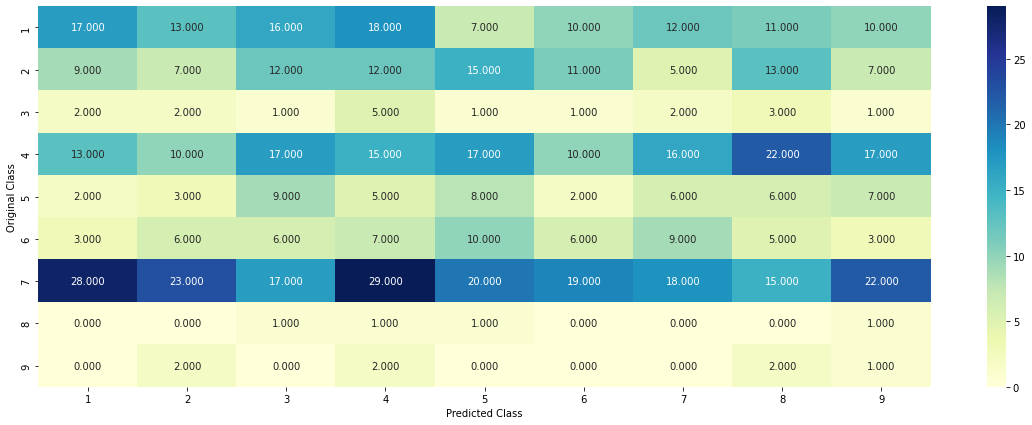

-------------------- Precision matrix (Columm Sum=1) --------------------


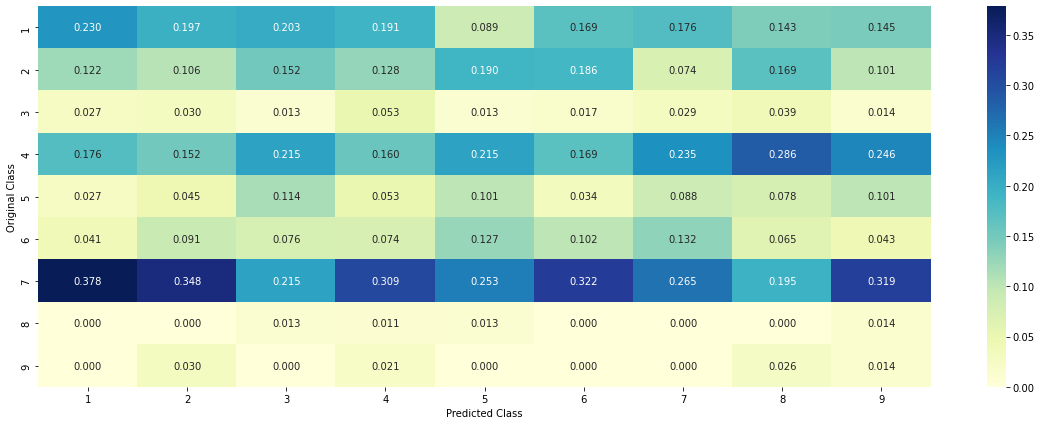

-------------------- Recall matrix (Row sum=1) --------------------


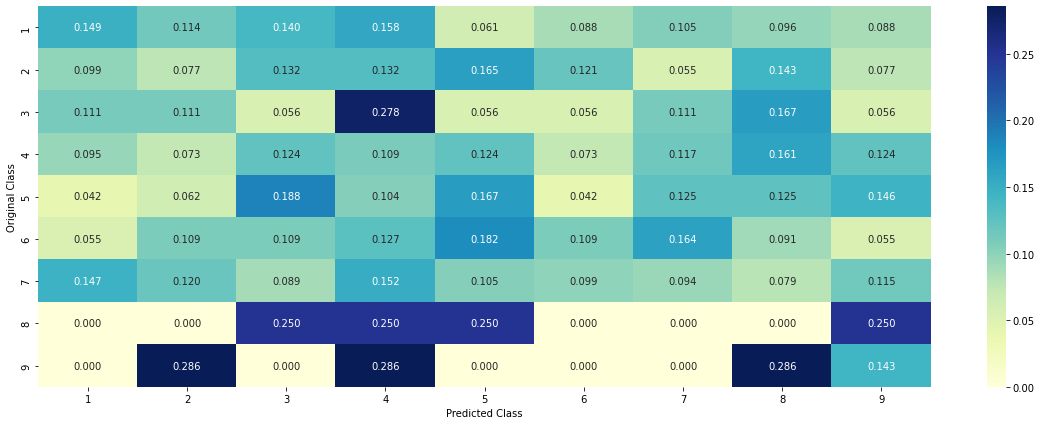

In [19]:
# we need to generate 9 no and sum of no should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum

test_data_len = test_df.shape[0]
cv_data_len = cv_df.shape[0]

# we create a output array that has exactly same size as the CV data
cv_predicted_y = np.zeros((cv_data_len,9))
for i in range(cv_data_len):
    rand_probs = np.random.rand(1,9)
    cv_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Cross Validation Data using Random Model",log_loss(y_cv,cv_predicted_y, eps=1e-15))


# Test-Set error.
#we create a output array that has exactly same as the test data
test_predicted_y = np.zeros((test_data_len,9))
for i in range(test_data_len):
    rand_probs = np.random.rand(1,9)
    test_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test,test_predicted_y, eps=1e-15))


predicted_y =np.argmax(test_predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y+1)

<h1>Univariate Analysis

<h3>Code for feature transformation using response coding

In [20]:
# code for response coding with Laplace smoothing.
# alpha : used for laplace smoothing
# feature: ['gene', 'variation']
# df: ['train_df', 'test_df', 'cv_df']
# algorithm
# ----------
# Consider all unique values and the number of occurances of given feature in train data dataframe
# build a vector (1*9) , the first element = (number of times it occured in class1 + 10*alpha / number of time it occurred in total data+90*alpha)
# gv_dict is like a look up table, for every gene it store a (1*9) representation of it
# for a value of feature in df:
# if it is in train data:
# we add the vector that was stored in 'gv_dict' look up table to 'gv_fea'
# if it is not there is train:
# we add [1/9, 1/9, 1/9, 1/9,1/9, 1/9, 1/9, 1/9, 1/9] to 'gv_fea'
# return 'gv_fea'
# ----------------------

# get_gv_fea_dict: Get Gene varaition Feature Dict
def get_gv_fea_dict(alpha,feature,df):
  # value_count: it contains a dict like
  # print(train_df['Gene'].value_counts())
  # output:
  #        {BRCA1      174
  #         TP53       106
  #         EGFR        86
  #         BRCA2       75
  #         PTEN        69
  #         KIT         61
  #         BRAF        60
  #         ERBB2       47
  #         PDGFRA      46
  #         ...}
  # print(train_df['Variation'].value_counts())
  # output:
  # {
  # Truncating_Mutations                     63
  # Deletion                                 43
  # Amplification                            43
  # Fusions                                  22
  # Overexpression                            3
  # E17K                                      3
  # Q61L                                      3
  # S222D                                     2
  # P130S                                     2
  # ...
  # }
  value_count = train_df[feature].value_counts()
  # gv_dict : Gene Variation Dict, which contains the probability array for each gene/variation
  gv_dict = dict()

  # denominator will contain the number of time that particular feature occured in whole data
  for i,denominator in value_count.items():
    # vec will contain (p(yi==1/Gi) probability of gene/variation belongs to perticular class
    # vec is 9 diamensional vector

    vec = []
    for k in range(1,10):
      # print(train_df.loc[(train_df['Class']==1) & (train_df['Gene']=='BRCA1')])
      #         ID   Gene             Variation  Class  
      # 2470  2470  BRCA1                S1715C      1   
      # 2486  2486  BRCA1                S1841R      1   
      # 2614  2614  BRCA1                   M1R      1   
      # 2432  2432  BRCA1                L1657P      1   
      # 2567  2567  BRCA1                T1685A      1   
      # 2583  2583  BRCA1                E1660G      1   
      # 2634  2634  BRCA1                W1718L      1   
      # cls_cnt.shape[0] will return the number of rows      
      
      cls_cnt = train_df.loc[(train_df['Class']==k) & (train_df[feature]==i)]
      # cls_cnt.shape[0](numerator) will contain the number of time that particular feature occured in whole data
      vec.append((cls_cnt.shape[0] + alpha*10)/ (denominator + 90*alpha))

    # we are adding the gene/variation to the dict as key and vec as value
    gv_dict[i]=vec
  return gv_dict

#Get Gene variation feature
def get_gv_feature(alpha,feature,df):
  gv_dict = get_gv_fea_dict(alpha,feature,df)
  #value_count id similar in get_gv_fea_dict  
  value_count = train_df[feature].value_counts()

  # gv_fea: Gene_variation feature, it will contain the feature for each feature value in the data
  gv_fea = []
  # for every feature values in the given data frame we will check if it is there in the train data then we will add the feature to gv_fea
  # if not we will add [1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9] to gv_fea
  for index, row in df.iterrows():
    if row[feature] in dict(value_count).keys():
      gv_fea.append(gv_dict[row[feature]])
            
        
    else:
      gv_fea.append([1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9])
      # gv_fea.append([-1,-1,-1,-1,-1,-1,-1,-1,-1])   
            
  return gv_fea

<h1>Univariate analysis on "Gene" Feature

<b>Q1.</b>
Gene ,What type of feature it is ?

<b>Ans:</b>
Gene is categorical variable

<b>Q2.</b>
How many categories are there and How they are distributed?

In [21]:
unique_genes= train_df['Gene'].value_counts()
print("No of Unique Gene :",unique_genes.shape[0])

print(unique_genes.head(10))

No of Unique Gene : 230
BRCA1     160
TP53      103
EGFR       90
BRCA2      84
PTEN       80
BRAF       61
KIT        58
ALK        50
ERBB2      46
PIK3CA     35
Name: Gene, dtype: int64


In [22]:
print("Ans: There are", unique_genes.shape[0] ,"different categories of genes in the train data, and they are distibuted as follows",)

Ans: There are 230 different categories of genes in the train data, and they are distibuted as follows


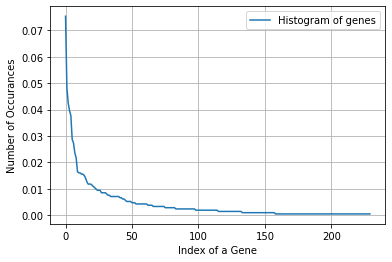

In [23]:
s = sum(unique_genes.values)

h = unique_genes.values/s
plt.plot(h,label="Histogram of genes")
plt.xlabel('Index of a Gene')
plt.ylabel('Number of Occurances')
plt.legend()
plt.grid()
plt.show()

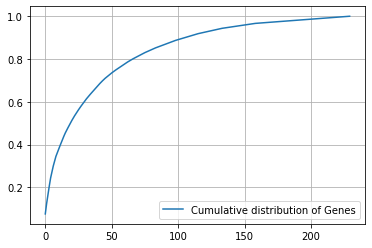

In [24]:
c = np.cumsum(h)
plt.plot(c,label='Cumulative distribution of Genes')
plt.grid()
plt.legend()
plt.show()

<h1><b>Q3.How to featurize this Gene feature?</h1></b>

1.One Hot Encoding

2.Response Coding



We will choose the appropriate featurization based on the ML model we use. For this problem of multi-class classification with categorical features, <b><U>one-hot encoding is better for Logistic regression</b> while <b>response coding is better for Random Forests.</b>

In [25]:
#responce coding of Gene feature
#alpha is used for laplace smoothing

alpha =1
 
#train gene feature
train_gene_feature_responseCoding = np.array(get_gv_feature(alpha,"Gene",train_df))
# test gene feature
test_gene_feature_responseCoding = np.array(get_gv_feature(alpha, "Gene", test_df))
# cross validation gene feature
cv_gene_feature_responseCoding = np.array(get_gv_feature(alpha, "Gene", cv_df))

In [26]:
print("train_gene_feature_responseCoding is converted feature using respone coding method. The shape of gene feature:", train_gene_feature_responseCoding.shape)

train_gene_feature_responseCoding is converted feature using respone coding method. The shape of gene feature: (2124, 9)


In [27]:
#one hot encoding of Gene feature
from sklearn.feature_extraction.text import CountVectorizer
# one-hot encoding of Gene feature.
gene_vectorizer = CountVectorizer()
train_gene_feature_onehotCoding = gene_vectorizer.fit_transform(train_df['Gene'])
test_gene_feature_onehotCoding = gene_vectorizer.transform(test_df['Gene'])
cv_gene_feature_onehotCoding = gene_vectorizer.transform(cv_df['Gene'])

In [28]:
print("train_gene_feature_onehotCoding is converted feature using one-hot encoding method. The shape of gene feature:", train_gene_feature_onehotCoding.shape)

train_gene_feature_onehotCoding is converted feature using one-hot encoding method. The shape of gene feature: (2124, 230)


In [29]:
print(train_gene_feature_onehotCoding.toarray()[222])

[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]


<p style="font-size:18px;"> <b>Q4.</b> How good is this gene feature  in predicting y_i?</p>

There are many ways to estimate how good a feature is, in predicting y_i. One of the good methods is to build a proper ML model using just this feature. In this case, we will build a logistic regression model using only Gene feature (one hot encoded) to predict y_i.

For values of alpha =  1e-05 The log loss is: 1.2155262226381462
For values of alpha =  0.0001 The log loss is: 1.2013761272544607
For values of alpha =  0.001 The log loss is: 1.256661923863325
For values of alpha =  0.01 The log loss is: 1.3683741469421178
For values of alpha =  0.1 The log loss is: 1.45378079956228
For values of alpha =  1 The log loss is: 1.485464357561597


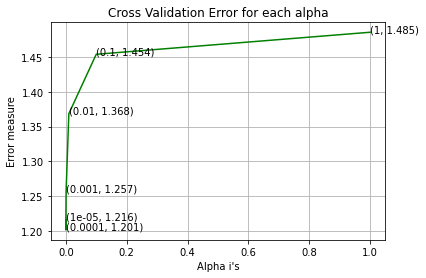

For values of best alpha =  0.0001 The train log loss is: 0.9903942071740257
For values of best alpha =  0.0001 The cross validation log loss is: 1.2013761272544607
For values of best alpha =  0.0001 The test log loss is: 1.1760234339635405


In [30]:
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
alpha = [10 ** x for x in range(-5,1)]

cv_log_error_array=[]

for i in alpha:
  clf = SGDClassifier(alpha=i,penalty='l2',loss='log',random_state=42)
  clf.fit(train_gene_feature_onehotCoding,y_train)
  sig_clf = CalibratedClassifierCV(clf,method='sigmoid')
  sig_clf.fit(train_gene_feature_onehotCoding, y_train)
  predict_y = sig_clf.predict_proba(cv_gene_feature_onehotCoding)
  cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
  print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig , ax = plt.subplots()
ax.plot(alpha,cv_log_error_array,c='g')

for i,txt in enumerate(np.round(cv_log_error_array,3)):

  ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))

plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_gene_feature_onehotCoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_gene_feature_onehotCoding, y_train)

predict_y = sig_clf.predict_proba(train_gene_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_gene_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_gene_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


<p style="font-size:18px;"> <b>Q5.</b> Is the Gene feature stable across all the data sets (Test, Train, Cross validation)?</p>
<p style="font-size:16px;"> <b>Ans.</b> Yes, it is. Otherwise, the CV and Test errors would be significantly more than train error. </p>

In [31]:
print("Q6. How many data points in Test and CV datasets are covered by the ", unique_genes.shape[0], " genes in train dataset?")

test_coverage=test_df[test_df['Gene'].isin(list(set(train_df['Gene'])))].shape[0]
cv_coverage=cv_df[cv_df['Gene'].isin(list(set(train_df['Gene'])))].shape[0]

print('Ans\n1. In test data',test_coverage, 'out of',test_df.shape[0], ":",(test_coverage/test_df.shape[0])*100)
print('2. In cross validation data',cv_coverage, 'out of ',cv_df.shape[0],":" ,(cv_coverage/cv_df.shape[0])*100)

Q6. How many data points in Test and CV datasets are covered by the  230  genes in train dataset?
Ans
1. In test data 643 out of 665 : 96.69172932330827
2. In cross validation data 511 out of  532 : 96.05263157894737


<p style="font-size:18px;"> <b>Q7.</b> Variation, What type of feature is it ?</p>
<p style="font-size:16px;"><b>Ans.</b> Variation is a categorical variable </p>
<p style="font-size:18px;"> <b>Q8.</b> How many categories are there?</p>

In [32]:
unique_variations = train_df['Variation'].value_counts()
print("No of unique variations :",unique_variations.shape[0])
#top 10 variations that occured most
print(unique_variations.head(10))

No of unique variations : 1913
Truncating_Mutations    60
Deletion                50
Amplification           48
Fusions                 24
T58I                     3
Q61R                     3
G12V                     3
G12C                     2
R170W                    2
P34R                     2
Name: Variation, dtype: int64


In [33]:
print("Ans: There are", unique_variations.shape[0] ,"different categories of variations in the train data, and they are distibuted as follows",)

Ans: There are 1913 different categories of variations in the train data, and they are distibuted as follows


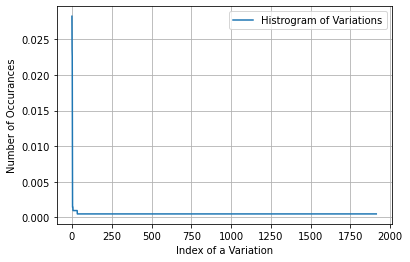

In [34]:
s = sum(unique_variations.values);
h = unique_variations.values/s;
plt.plot(h, label="Histrogram of Variations")
plt.xlabel('Index of a Variation')
plt.ylabel('Number of Occurances')
plt.legend()
plt.grid()
plt.show()

[0.02824859 0.05178908 0.07438795 ... 0.99905838 0.99952919 1.        ]


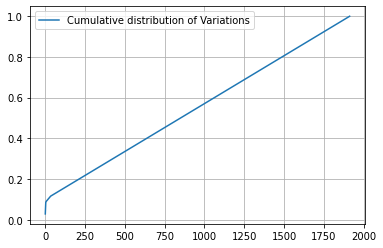

In [35]:
c = np.cumsum(h)
print(c)
plt.plot(c,label='Cumulative distribution of Variations')
plt.grid()
plt.legend()
plt.show()


<p style="font-size:18px;"> <b>Q9.</b> How to featurize this Variation feature ?</p>

<b>1.One Hot Encoding

2.Response Coding

In [36]:
# alpha is used for laplace smoothing
alpha = 1
# train gene feature
train_variation_feature_responseCoding = np.array(get_gv_feature(alpha, "Variation", train_df))
# test gene feature
test_variation_feature_responseCoding = np.array(get_gv_feature(alpha, "Variation", test_df))
# cross validation gene feature
cv_variation_feature_responseCoding = np.array(get_gv_feature(alpha, "Variation", cv_df))

In [37]:
print("train_variation_feature_responseCoding is a converted feature using the response coding method. The shape of Variation feature:", train_variation_feature_responseCoding.shape)

train_variation_feature_responseCoding is a converted feature using the response coding method. The shape of Variation feature: (2124, 9)


In [38]:
# one-hot encoding of variation feature.
variation_vectorizer = CountVectorizer()
train_variation_feature_onehotCoding = variation_vectorizer.fit_transform(train_df['Variation'])
test_variation_feature_onehotCoding = variation_vectorizer.transform(test_df['Variation'])
cv_variation_feature_onehotCoding = variation_vectorizer.transform(cv_df['Variation'])

In [39]:
print("train_variation_feature_onehotEncoded is converted feature using the onne-hot encoding method. The shape of Variation feature:", train_variation_feature_onehotCoding.shape)

train_variation_feature_onehotEncoded is converted feature using the onne-hot encoding method. The shape of Variation feature: (2124, 1940)


<p style="font-size:18px;"> <b>Q10.</b> How good is this Variation feature  in predicting y_i?</p>

For values of alpha =  1e-05 The log loss is: 1.7360487851623498
For values of alpha =  0.0001 The log loss is: 1.729340290381636
For values of alpha =  0.001 The log loss is: 1.7314182595263552
For values of alpha =  0.01 The log loss is: 1.7408457501307038
For values of alpha =  0.1 The log loss is: 1.7505706540919306
For values of alpha =  1 The log loss is: 1.7512201547261128


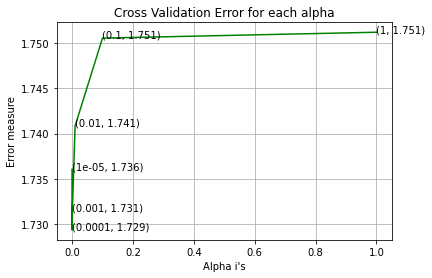

For values of best alpha =  0.0001 The train log loss is: 0.6710178700329306
For values of best alpha =  0.0001 The cross validation log loss is: 1.729340290381636
For values of best alpha =  0.0001 The test log loss is: 1.7007567803037973


In [40]:
alpha = [10 ** x for x in range(-5, 1)]

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_variation_feature_onehotCoding, y_train)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_variation_feature_onehotCoding, y_train)
    predict_y = sig_clf.predict_proba(cv_variation_feature_onehotCoding)
    
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_variation_feature_onehotCoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_variation_feature_onehotCoding, y_train)

predict_y = sig_clf.predict_proba(train_variation_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_variation_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_variation_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


In [41]:
print("Q12. How many data points are covered by total ", unique_variations.shape[0], " genes in test and cross validation data sets?")
test_coverage=test_df[test_df['Variation'].isin(list(set(train_df['Variation'])))].shape[0]
cv_coverage=cv_df[cv_df['Variation'].isin(list(set(train_df['Variation'])))].shape[0]
print('Ans\n1. In test data',test_coverage, 'out of',test_df.shape[0], ":",(test_coverage/test_df.shape[0])*100)
print('2. In cross validation data',cv_coverage, 'out of ',cv_df.shape[0],":" ,(cv_coverage/cv_df.shape[0])*100)

Q12. How many data points are covered by total  1913  genes in test and cross validation data sets?
Ans
1. In test data 67 out of 665 : 10.075187969924812
2. In cross validation data 46 out of  532 : 8.646616541353383


<h3> Univariate Analysis on Text Feature</h3>

1. How many unique words are present in train data?
2. How are word frequencies distributed?
3. How to featurize text field?
4. Is the text feature useful in predicitng y_i?
5. Is the text feature stable across train, test and CV datasets?

In [42]:
# cls_text is a data frame
# for every row in data fram consider the 'TEXT'
# split the words by space
# make a dict with those words
# increment its count whenever we see that word
from collections import defaultdict
def extract_dictionary_paddle(cls_text):
  dictionary = defaultdict(int)
  for index,row in cls_text.iterrows():
    for word in row['TEXT'].split():
      dictionary[word]+=1
  return dictionary   



In [43]:
import math
#https://stackoverflow.com/a/1602964
def get_text_responsecoding(df):
    text_feature_responseCoding = np.zeros((df.shape[0],9))
    for i in range(0,9):
        row_index = 0
        for index, row in df.iterrows():
            sum_prob = 0
            for word in row['TEXT'].split():
                sum_prob += math.log(((dict_list[i].get(word,0)+10 )/(total_dict.get(word,0)+90)))
            text_feature_responseCoding[row_index][i] = math.exp(sum_prob/len(row['TEXT'].split()))
            row_index += 1
    return text_feature_responseCoding

In [44]:
# building a CountVectorizer with all the words that occured minimum 3 times in train data
text_vectorizer = CountVectorizer(min_df=3)
train_text_feature_onehotCoding = text_vectorizer.fit_transform(train_df['TEXT'])
# getting all the feature names (words)
train_text_features= text_vectorizer.get_feature_names()

# train_text_feature_onehotCoding.sum(axis=0).A1 will sum every row and returns (1*number of features) vector
train_text_fea_counts = train_text_feature_onehotCoding.sum(axis=0).A1

# zip(list(text_features),text_fea_counts) will zip a word with its number of times it occured
text_fea_dict = dict(zip(list(train_text_features),train_text_fea_counts))


print("Total number of unique words in train data :", len(train_text_features))

Total number of unique words in train data : 53386


In [45]:
dict_list = []
# dict_list =[] contains 9 dictoinaries each corresponds to a class

for i in range(1,10):
  cls_text = train_df[train_df['Class']==i]
  # build a word dict based on the words in that class
  dict_list.append(extract_dictionary_paddle(cls_text))
  #append it to dict_list

# dict_list[i] is build on i'th  class text data
# total_dict is buid on whole training text data

total_dict = extract_dictionary_paddle(train_df)

confuse_array = []
for i in train_text_features:
  ratios = []
  max_val = -1
  for j in range(0,9):
    ratios.append((dict_list[j][i]+10)/(total_dict[i]+90))
  confuse_array.append(ratios)
confuse_array = np.array(confuse_array)    

In [46]:
#response coding of text features
train_text_feature_responseCoding  = get_text_responsecoding(train_df)
test_text_feature_responseCoding  = get_text_responsecoding(test_df)
cv_text_feature_responseCoding  = get_text_responsecoding(cv_df)

In [47]:
from sklearn.preprocessing import normalize
# don't forget to normalize every feature
train_text_feature_onehotCoding = normalize(train_text_feature_onehotCoding, axis=0)

# we use the same vectorizer that was trained on train data
test_text_feature_onehotCoding = text_vectorizer.transform(test_df['TEXT'])
# don't forget to normalize every feature
test_text_feature_onehotCoding = normalize(test_text_feature_onehotCoding, axis=0)

# we use the same vectorizer that was trained on train data
cv_text_feature_onehotCoding = text_vectorizer.transform(cv_df['TEXT'])
# don't forget to normalize every feature
cv_text_feature_onehotCoding = normalize(cv_text_feature_onehotCoding, axis=0)

In [48]:
#https://stackoverflow.com/a/2258273/4084039
sorted_text_fea_dict = dict(sorted(text_fea_dict.items(), key=lambda x: x[1] , reverse=True))
sorted_text_occur = np.array(list(sorted_text_fea_dict.values()))

In [49]:
# Number of words for a given frequency.
from collections import Counter
print(Counter(sorted_text_occur))

Counter({3: 5454, 4: 3389, 6: 2798, 5: 2788, 8: 2090, 9: 2019, 7: 1927, 10: 1350, 12: 1321, 11: 1296, 15: 938, 16: 911, 13: 897, 14: 791, 17: 737, 18: 701, 24: 598, 20: 531, 21: 488, 19: 483, 25: 453, 43: 450, 22: 434, 26: 431, 23: 429, 28: 356, 27: 350, 30: 347, 36: 340, 32: 300, 31: 270, 29: 264, 35: 262, 40: 251, 33: 242, 34: 234, 39: 208, 38: 206, 37: 201, 50: 192, 45: 189, 44: 189, 42: 180, 48: 179, 41: 176, 52: 171, 47: 162, 49: 156, 46: 155, 56: 153, 54: 143, 55: 140, 53: 133, 51: 133, 65: 131, 57: 130, 72: 123, 59: 120, 64: 116, 58: 116, 60: 113, 66: 109, 67: 107, 62: 107, 86: 105, 68: 101, 69: 100, 76: 99, 61: 98, 70: 95, 75: 91, 80: 90, 63: 90, 74: 88, 71: 84, 79: 81, 77: 80, 73: 74, 87: 72, 78: 72, 84: 70, 108: 69, 95: 69, 85: 69, 83: 69, 88: 68, 92: 67, 94: 66, 82: 66, 91: 65, 96: 64, 81: 63, 100: 58, 120: 57, 98: 57, 105: 56, 110: 55, 89: 55, 97: 54, 111: 51, 113: 50, 130: 49, 112: 49, 102: 49, 115: 48, 104: 47, 90: 47, 103: 46, 99: 46, 138: 45, 101: 45, 119: 44, 114: 44, 

For values of alpha =  1e-05 The log loss is: 1.3363214010089122
For values of alpha =  0.0001 The log loss is: 1.2315027412566866
For values of alpha =  0.001 The log loss is: 1.2478511761748965
For values of alpha =  0.01 The log loss is: 1.3780597442370563
For values of alpha =  0.1 The log loss is: 1.4924162734241673
For values of alpha =  1 The log loss is: 1.6743747377446598


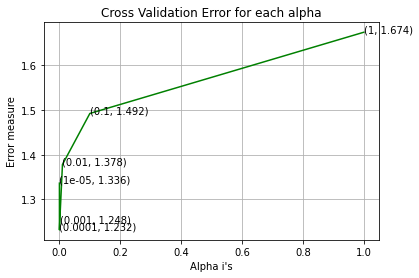

For values of best alpha =  0.0001 The train log loss is: 0.6586386020421213
For values of best alpha =  0.0001 The cross validation log loss is: 1.2315027412566866
For values of best alpha =  0.0001 The test log loss is: 1.206721009257665


In [50]:
# Train a Logistic regression+Calibration model using text features whicha re on-hot encoded
alpha = [10 ** x for x in range(-5, 1)]

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_text_feature_onehotCoding, y_train)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_text_feature_onehotCoding, y_train)
    predict_y = sig_clf.predict_proba(cv_text_feature_onehotCoding)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_text_feature_onehotCoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_text_feature_onehotCoding, y_train)

predict_y = sig_clf.predict_proba(train_text_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_text_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_text_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


<p style="font-size:18px;"> <b>Q.</b> Is the Text feature stable across all the data sets (Test, Train, Cross validation)?</p>
<p style="font-size:16px;"> <b>Ans.</b> Yes, it seems like! </p>

In [51]:
def get_intersec_text(df):
    df_text_vec = CountVectorizer(min_df=3)
    df_text_fea = df_text_vec.fit_transform(df['TEXT'])
    df_text_features = df_text_vec.get_feature_names()

    df_text_fea_counts = df_text_fea.sum(axis=0).A1
    df_text_fea_dict = dict(zip(list(df_text_features),df_text_fea_counts))
    len1 = len(set(df_text_features))
    len2 = len(set(train_text_features) & set(df_text_features))
    return len1,len2

In [52]:
len1,len2 = get_intersec_text(test_df)
print(np.round((len2/len1)*100, 3), "% of word of test data appeared in train data")
len1,len2 = get_intersec_text(cv_df)
print(np.round((len2/len1)*100, 3), "% of word of Cross Validation appeared in train data")

97.546 % of word of test data appeared in train data
97.617 % of word of Cross Validation appeared in train data


<h1>4. Machine Learning Models</h1>

In [53]:
#Data preparation for ML models.

#Misc. functionns for ML models


def predict_and_plot_confusion_matrix(train_x, train_y,test_x, test_y, clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    pred_y = sig_clf.predict(test_x)

    # for calculating log_loss we willl provide the array of probabilities belongs to each class
    print("Log loss :",log_loss(test_y, sig_clf.predict_proba(test_x)))
    # calculating the number of data points that are misclassified
    print("Number of mis-classified points :", np.count_nonzero((pred_y- test_y))/test_y.shape[0])
    plot_confusion_matrix(test_y, pred_y)

In [54]:
def report_log_loss(train_x, train_y, test_x, test_y,  clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    sig_clf_probs = sig_clf.predict_proba(test_x)
    return log_loss(test_y, sig_clf_probs, eps=1e-15)

In [55]:
# this function will be used just for naive bayes
# for the given indices, we will print the name of the features
# and we will check whether the feature present in the test point text or not
def get_impfeature_names(indices, text, gene, var, no_features):
    gene_count_vec = CountVectorizer()
    var_count_vec = CountVectorizer()
    text_count_vec = CountVectorizer(min_df=3)
    
    gene_vec = gene_count_vec.fit(train_df['Gene'])
    var_vec  = var_count_vec.fit(train_df['Variation'])
    text_vec = text_count_vec.fit(train_df['TEXT'])
    
    fea1_len = len(gene_vec.get_feature_names())
    fea2_len = len(var_count_vec.get_feature_names())
    
    word_present = 0
    for i,v in enumerate(indices):
        if (v < fea1_len):
            word = gene_vec.get_feature_names()[v]
            yes_no = True if word == gene else False
            if yes_no:
                word_present += 1
                print(i, "Gene feature [{}] present in test data point [{}]".format(word,yes_no))
        elif (v < fea1_len+fea2_len):
            word = var_vec.get_feature_names()[v-(fea1_len)]
            yes_no = True if word == var else False
            if yes_no:
                word_present += 1
                print(i, "variation feature [{}] present in test data point [{}]".format(word,yes_no))
        else:
            word = text_vec.get_feature_names()[v-(fea1_len+fea2_len)]
            yes_no = True if word in text.split() else False
            if yes_no:
                word_present += 1
                print(i, "Text feature [{}] present in test data point [{}]".format(word,yes_no))

    print("Out of the top ",no_features," features ", word_present, "are present in query point")

<p style="font-size:24px;text-align:Center"> <b>Stacking the three types of features </b><p>

In [56]:
from scipy.sparse import hstack
# merging gene, variance and text features

# building train, test and cross validation data sets
# a = [[1, 2], 
#      [3, 4]]
# b = [[4, 5], 
#      [6, 7]]
# hstack(a, b) = [[1, 2, 4, 5],
#                [ 3, 4, 6, 7]]

train_gene_var_onehotCoding = hstack((train_gene_feature_onehotCoding,train_variation_feature_onehotCoding))
test_gene_var_onehotCoding = hstack((test_gene_feature_onehotCoding,test_variation_feature_onehotCoding))
cv_gene_var_onehotCoding = hstack((cv_gene_feature_onehotCoding,cv_variation_feature_onehotCoding))

train_x_onehotCoding = hstack((train_gene_var_onehotCoding, train_text_feature_onehotCoding)).tocsr()
train_y = np.array(list(train_df['Class']))

test_x_onehotCoding = hstack((test_gene_var_onehotCoding, test_text_feature_onehotCoding)).tocsr()
test_y = np.array(list(test_df['Class']))

cv_x_onehotCoding = hstack((cv_gene_var_onehotCoding, cv_text_feature_onehotCoding)).tocsr()
cv_y = np.array(list(cv_df['Class']))

In [57]:
print("One hot encoding features :")
print("(number of data points * number of features) in train data = ", train_x_onehotCoding.shape)
print("(number of data points * number of features) in test data = ", test_x_onehotCoding.shape)
print("(number of data points * number of features) in cross validation data =", cv_x_onehotCoding.shape)

One hot encoding features :
(number of data points * number of features) in train data =  (2124, 55556)
(number of data points * number of features) in test data =  (665, 55556)
(number of data points * number of features) in cross validation data = (532, 55556)


In [58]:

train_gene_var_responseCoding = np.hstack((train_gene_feature_responseCoding,train_variation_feature_responseCoding))
test_gene_var_responseCoding = np.hstack((test_gene_feature_responseCoding,test_variation_feature_responseCoding))
cv_gene_var_responseCoding = np.hstack((cv_gene_feature_responseCoding,cv_variation_feature_responseCoding))

train_x_responseCoding = np.hstack((train_gene_var_responseCoding, train_text_feature_responseCoding))
test_x_responseCoding = np.hstack((test_gene_var_responseCoding, test_text_feature_responseCoding))
cv_x_responseCoding = np.hstack((cv_gene_var_responseCoding, cv_text_feature_responseCoding))


In [59]:
print(" Response encoding features :")
print("(number of data points * number of features) in train data = ", train_x_responseCoding.shape)
print("(number of data points * number of features) in test data = ", test_x_responseCoding.shape)
print("(number of data points * number of features) in cross validation data =", cv_x_responseCoding.shape)

 Response encoding features :
(number of data points * number of features) in train data =  (2124, 27)
(number of data points * number of features) in test data =  (665, 27)
(number of data points * number of features) in cross validation data = (532, 27)


<h2>4.1. Base Line Model</h2>

<h3>4.1.1. Naive Bayes</h3>

<h4>4.1.1.1. Hyper parameter tuning</h4>

for alpha = 1e-05
Log Loss : 1.3587507410907755
for alpha = 0.0001
Log Loss : 1.3629529249480044
for alpha = 0.001
Log Loss : 1.3658457255664196
for alpha = 0.1
Log Loss : 1.380231276741699
for alpha = 1
Log Loss : 1.367455123549857
for alpha = 10
Log Loss : 1.4348529749144996
for alpha = 100
Log Loss : 1.437787651481929
for alpha = 1000
Log Loss : 1.4135383002349198


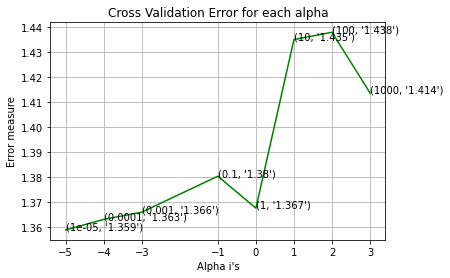

For values of best alpha =  1e-05 The train log loss is: 0.8012183492958479
For values of best alpha =  1e-05 The cross validation log loss is: 1.3587507410907755
For values of best alpha =  1e-05 The test log loss is: 1.2839155113957694


In [60]:

from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

alpha = [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = MultinomialNB(alpha=i)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(np.log10(alpha), cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (np.log10(alpha[i]),cv_log_error_array[i]))
plt.grid()
plt.xticks(np.log10(alpha))
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)


predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


Log Loss : 1.3587507410907755
Number of missclassified point : 0.43609022556390975
____________________ Confusion matrix ____________________


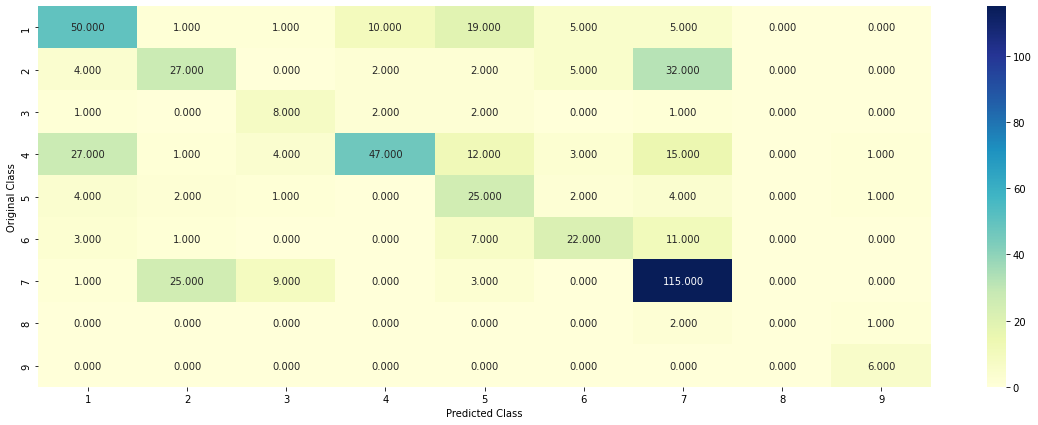

-------------------- Precision matrix (Columm Sum=1) --------------------


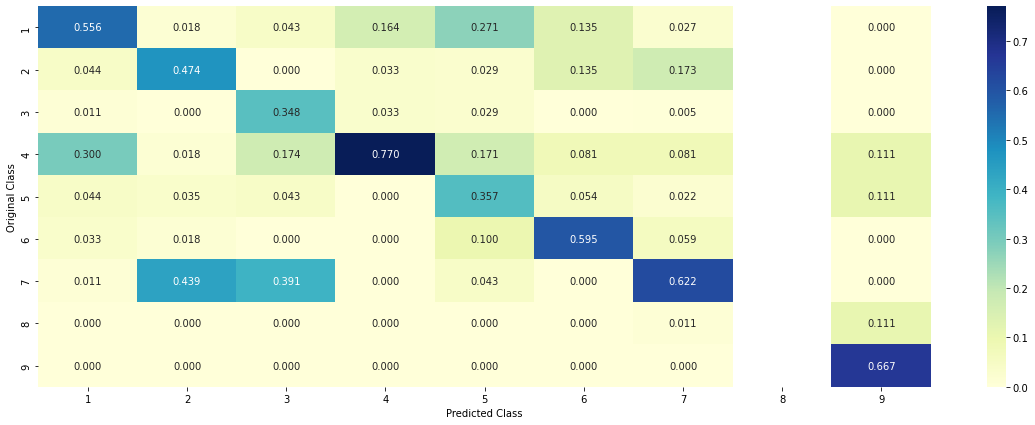

-------------------- Recall matrix (Row sum=1) --------------------


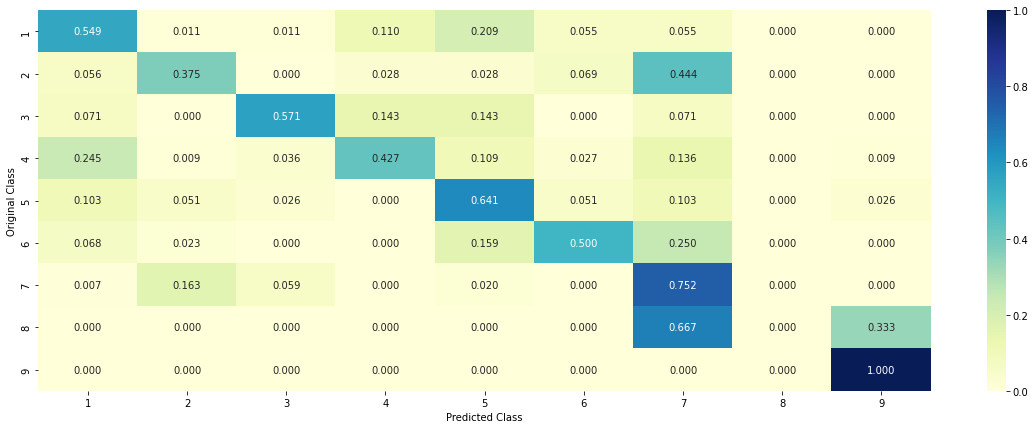

In [61]:
clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)
sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
# to avoid rounding error while multiplying probabilites we use log-probability estimates
print("Log Loss :",log_loss(cv_y, sig_clf_probs))
print("Number of missclassified point :", np.count_nonzero((sig_clf.predict(cv_x_onehotCoding)- cv_y))/cv_y.shape[0])
plot_confusion_matrix(cv_y, sig_clf.predict(cv_x_onehotCoding.toarray()))

<h4>4.1.1.3. Feature Importance, Correctly classified point</h4>

In [62]:
test_point_index = 150
no_feature = 100
predected_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicteed Class :-",predected_cls[0])
print("Predicted Class Probabilities:-",np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :-",test_y[test_point_index])

indices = np.argsort(-1*clf.coef_)[predected_cls-1][:,:no_feature]
print("-"*50)

get_impfeature_names(indices[0],test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index].lower(),test_df['Variation'].iloc[test_point_index].lower(),no_feature)

Predicteed Class :- 2
Predicted Class Probabilities:- [[0.1017 0.537  0.0147 0.115  0.0455 0.0398 0.1348 0.0062 0.0052]]
Actual Class :- 2
--------------------------------------------------
0 Gene feature [kit] present in test data point [True]
15 Text feature [identified] present in test data point [True]
16 Text feature [molecular] present in test data point [True]
25 Text feature [including] present in test data point [True]
26 Text feature [another] present in test data point [True]
28 Text feature [clinical] present in test data point [True]
29 Text feature [15] present in test data point [True]
30 Text feature [confirmed] present in test data point [True]
32 Text feature [12] present in test data point [True]
33 Text feature [different] present in test data point [True]
34 Text feature [harbored] present in test data point [True]
35 Text feature [using] present in test data point [True]
36 Text feature [found] present in test data point [True]
37 Text feature [patient] present in

In [63]:
no_feature

100

In [64]:
test_df['Gene'].iloc[test_point_index].lower()

'kit'

In [65]:
test_df['Variation'].iloc[test_point_index]

'W557_V559delinsC'

In [66]:
clf.coef_.shape

(9, 55556)

In [67]:
indices=np.argsort(-1*abs(clf.coef_))[predected_cls-1][:,:no_feature]
indices[0]

array([27777, 29409, 29408, 29405, 29400, 29395, 29388, 29386, 29381,
       29379, 29369, 29366, 29365, 29363, 29362, 29360, 29359, 29351,
       29350, 29345, 29337, 29332, 29330, 29329, 29326, 29323, 29410,
       29414, 29415, 29419, 29505, 29495, 29490, 29483, 29480, 29474,
       29467, 29464, 29463, 29462, 29461, 29460, 29321, 29458, 29455,
       29454, 29445, 29442, 29441, 29440, 29437, 29435, 29433, 29431,
       29425, 29424, 29456, 29506, 29319, 29308, 29215, 29214, 29213,
       29210, 29202, 29201, 29198, 29196, 29194, 29190, 29179, 29176,
       29172, 29165, 29164, 29160, 29154, 29153, 29140, 29134, 29132,
       29126, 29122, 29112, 29106, 29217, 29221, 29225, 29227, 29303,
       29291, 29288, 29283, 29282, 29276, 29274, 29273, 29272, 29269,
       29266])

<h2>4.2. K Nearest Neighbour Classification</h2>

<h3>4.2.1. Hyper parameter tuning</h3>

for alpha =  5
Log Loss : 1.108897486990376
for alpha =  11
Log Loss : 1.0979801336720978
for alpha =  15
Log Loss : 1.1070564105529448
for alpha =  21
Log Loss : 1.1290842374352423
for alpha =  31
Log Loss : 1.1499593875658032
for alpha =  41
Log Loss : 1.148903737663132
for alpha =  51
Log Loss : 1.1611016362289903
for alpha =  99
Log Loss : 1.1708202076562728


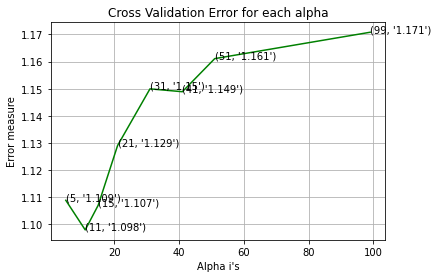

For values of best alpha =  11 The train log loss is: 0.6029250870177889
For values of best alpha =  11 The cross validation log loss is: 1.0979801336720978
For values of best alpha =  11 The test log loss is: 1.0581495556701417


In [68]:
from sklearn.neighbors import KNeighborsClassifier
alpha = [5, 11, 15, 21, 31, 41, 51, 99]
cv_log_error_array = []

for i in alpha:
  print("for alpha = ",i)
  clf = KNeighborsClassifier(n_neighbors=i)
  clf.fit(train_x_responseCoding,train_y)
  sig_clf = CalibratedClassifierCV(clf,method="sigmoid")
  sig_clf.fit(train_x_responseCoding, train_y)
  sig_clf_probs = sig_clf.predict_proba(cv_x_responseCoding)
  cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
  # to avoid rounding error while multiplying probabilites we use log-probability estimates
  print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig ,ax = plt.subplots()  
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

best_alpha = np.argmin(cv_log_error_array)
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_responseCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_responseCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_responseCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))



<h3>4.2.2. Testing the model with best hyper paramters</h3>

Log loss : 1.0979801336720978
Number of mis-classified points : 0.3684210526315789
____________________ Confusion matrix ____________________


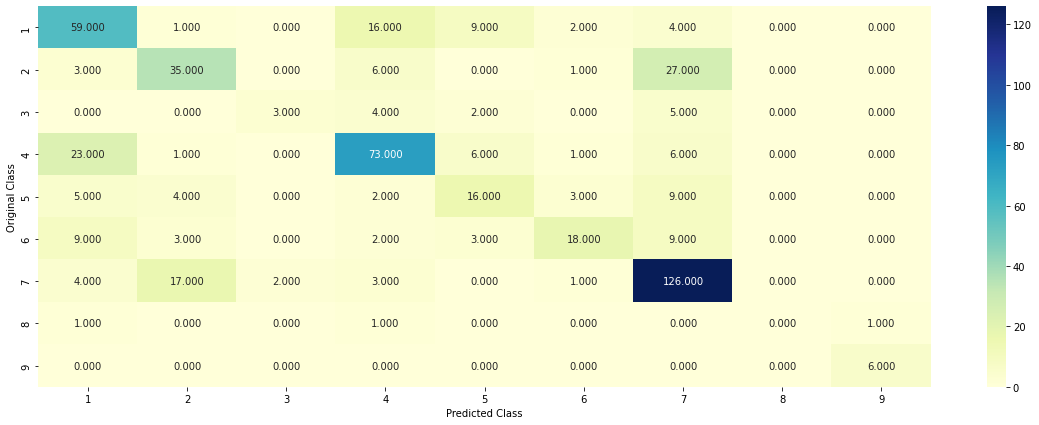

-------------------- Precision matrix (Columm Sum=1) --------------------


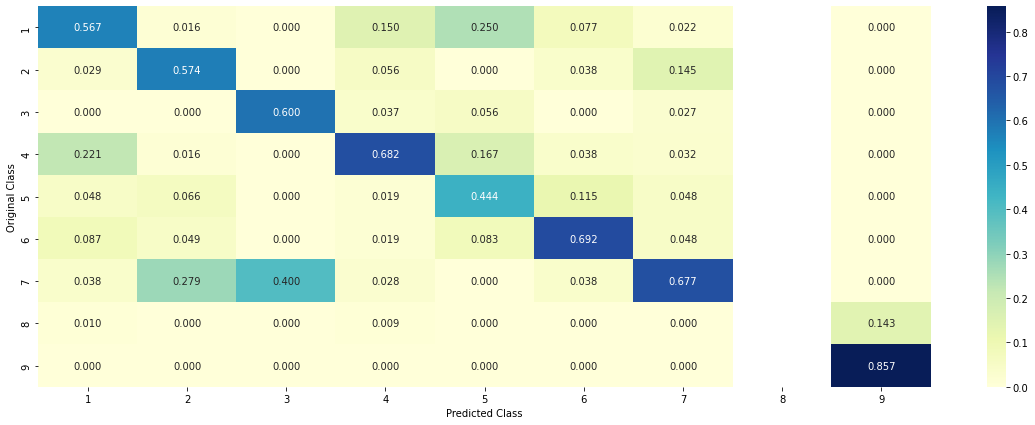

-------------------- Recall matrix (Row sum=1) --------------------


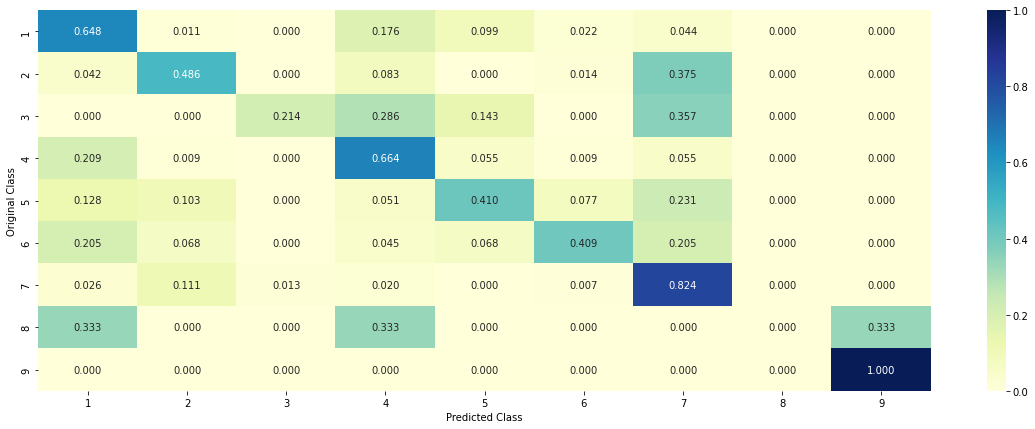

In [69]:
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
predict_and_plot_confusion_matrix(train_x_responseCoding, train_y, cv_x_responseCoding, cv_y, clf)


<h3>4.2.3.Sample Query point -1</h3>

In [70]:
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

test_point_index = 50
predicted_cls = sig_clf.predict(test_x_responseCoding[0].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Actual Class :", test_y[test_point_index])
neighbors = clf.kneighbors(test_x_responseCoding[test_point_index].reshape(1, -1), alpha[best_alpha])
print("The ",alpha[best_alpha]," nearest neighbours of the test points belongs to classes",train_y[neighbors[1][0]])
print("Fequency of nearest points :",Counter(train_y[neighbors[1][0]]))


Predicted Class : 4
Actual Class : 4
The  11  nearest neighbours of the test points belongs to classes [4 4 4 4 4 4 4 1 4 4 4]
Fequency of nearest points : Counter({4: 10, 1: 1})


<h2>4.3. Logistic Regression</h2>

<h3>4.3.1. With Class balancing</h3>

<h4>4.3.1.1. Hyper paramter tuning</h4>


for alpha = 1e-06
Log Loss : 1.3970093720481378
for alpha = 1e-05
Log Loss : 1.3691687065788483
for alpha = 0.0001
Log Loss : 1.1976590011340782
for alpha = 0.001
Log Loss : 1.1834649041293095
for alpha = 0.01
Log Loss : 1.2680527545792768
for alpha = 0.1
Log Loss : 1.5612544327696565
for alpha = 1
Log Loss : 1.7559391168081393
for alpha = 10
Log Loss : 1.7789206062784024
for alpha = 100
Log Loss : 1.7810217080109059


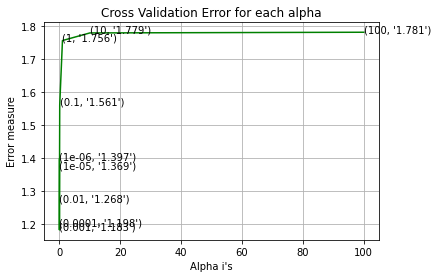

For values of best alpha =  0.001 The train log loss is: 0.526171885838822
For values of best alpha =  0.001 The cross validation log loss is: 1.1834649041293095
For values of best alpha =  0.001 The test log loss is: 1.1173672242726171


In [71]:
alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 


fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))



<h4>4.3.1.2. Testing the model with best hyper paramters</h4>

Log loss : 1.1834649041293095
Number of mis-classified points : 0.40225563909774437
____________________ Confusion matrix ____________________


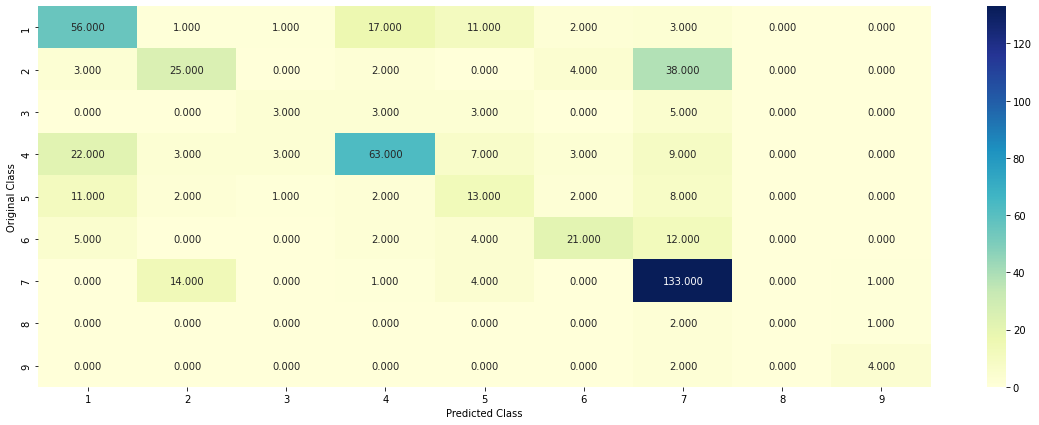

-------------------- Precision matrix (Columm Sum=1) --------------------


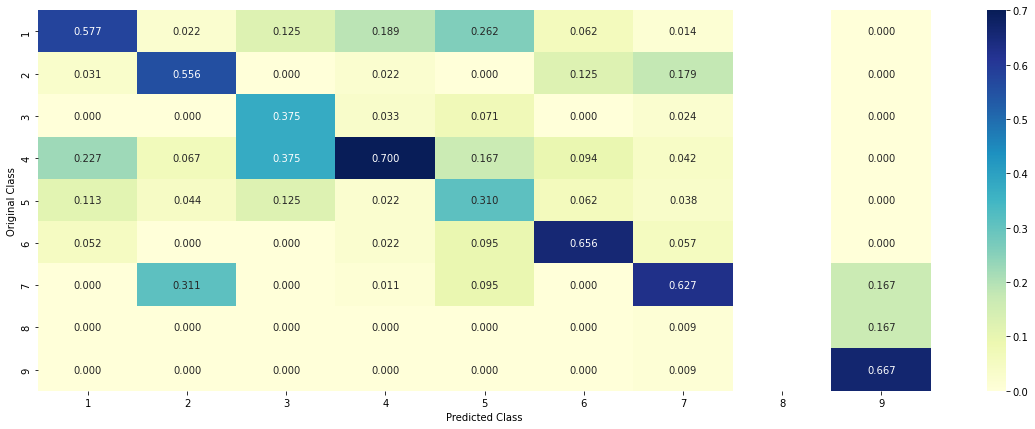

-------------------- Recall matrix (Row sum=1) --------------------


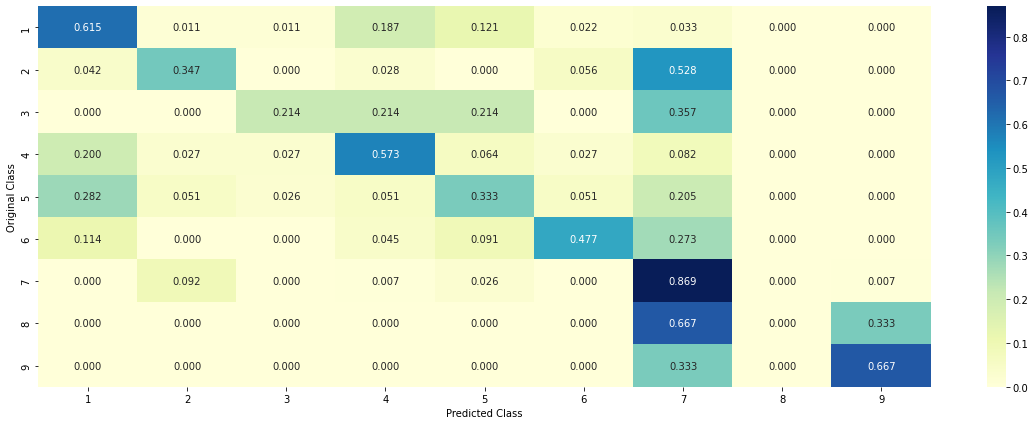

In [72]:
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y, cv_x_onehotCoding, cv_y, clf)

<h5>4.3.1.3.1. Correctly Classified point</h5>

In [73]:
# from tabulate import tabulate
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding,train_y)
test_point_index = 1
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 4
Predicted Class Probabilities: [[5.000e-04 1.100e-03 1.000e-04 9.923e-01 7.000e-04 2.000e-04 3.000e-04
  4.500e-03 3.000e-04]]
Actual Class : 4
--------------------------------------------------
332 Text feature [novel] present in test data point [True]
401 Text feature [suppressor] present in test data point [True]
405 Text feature [truncate] present in test data point [True]
488 Text feature [microscopy] present in test data point [True]
Out of the top  500  features  4 are present in query point
